# Showcase how to run and plot a simulation of virtual Argo floats

Here only trajectories are looked at, not measurements collected by floats.

If you run this notebook on Binder, velocity data have automatically been downloaded.

The velocity fields used is from the 1/12 Mercator forecast ([GLOBAL-ANALYSIS-FORECAST-PHY-001-024](https://resources.marine.copernicus.eu/?option=com_csw&task=results?option=com_csw&view=details&product_id=GLOBAL_ANALYSIS_FORECAST_PHY_001_024)).

This notebook is for demonstration purposes only, so the velocity field is limited to the 1st day of each 2019 months (i.e. 12 fields).

***
Script prepared by [K Balem](http://github.com/quai20) and [G Maze](http://github.com/gmaze) (Jun. 2020)

This work is part and was supported by the following projects:
<div>
<img src="https://avatars1.githubusercontent.com/u/58258213?s=460&v=4" width="70"/>
<img src="https://www.argo-france.fr/wp-content/uploads/2019/10/Argo-logo_banner-color.png" width="200"/>
<img src="https://www.umr-lops.fr/var/storage/images/_aliases/logo_main/medias-ifremer/medias-lops/logos/logo-lops-2/1459683-4-fre-FR/Logo-LOPS-2.png" width="70"/>
</div>

In [1]:
import sys
import numpy as np
import xarray as xr
import pandas as pd

sys.path.insert(0, "..") # This is while waiting for the pypi integration
import virtualargofleet as vaf

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import cartopy.crs as ccrs
import cartopy.feature as cfeature
land_feature = cfeature.NaturalEarthFeature(category='physical',name='land',scale='50m',facecolor=[0.4,0.6,0.7])

# Set-up the velocity field

In [2]:
# Set how to find the velocity field
# src = "/home/datawork-lops-oh/somovar/WP1/data/GLOBAL-ANALYSIS-FORECAST-PHY-001-024" # Datarmor
# src = "/Users/gmaze/data/MERCATOR/data/GLOBAL-ANALYSIS-FORECAST-PHY-001-024" # Laptop
src = "/export/home/kbalem/Bureau/VirtualFleet/knotebooks/data/"

filenames = {'U': src + "/2019*.nc",
             'V': src + "/2019*.nc"}
variables = {'U':'uo','V':'vo'}
dimensions = {'time': 'time', 'depth':'depth', 'lat': 'latitude', 'lon': 'longitude'}

In [3]:
# Ddefine the velocity field object of the VF:
# USAGE : obj = vaf.velocityfield(ds=filenames, var=variables, dim=dimensions, isglobal=0 or 1) 
VELfield = vaf.velocityfield(ds=filenames, var=variables, dim=dimensions, isglobal=0)

/opt/anaconda3/envs/virtualfleet/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/virtualfleet/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
INFO: Unable to locate chunking hints from dask, thus estimating the max. chunk size heuristically. Please consider defining the 'chunk-size' for 'array' in your local dask configuration file (see http://oceanparcels.org/faq.html#field_chunking_config and https://docs.dask.org).
/opt/anaconda3/envs/virtualfleet/lib/python3.6/site-packages/parcels/plotting.py:224: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. I

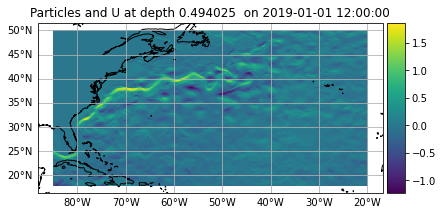

In [4]:
VELfield.plot()

# Define a deployment plan of virtual Argo floats

Choose to run one of the following plans:


## Plan A: Random in a small rectangular region

In [5]:
# Number of float we want to simulate
nfloats = 5

# Then we must define numpy array (size nfloats) for lat, lon, depth and time
lon0, lat0 = -50.00, 36.00  # Center of the box
Lx, Ly = 1., 1. # Size of the box
lon = np.random.uniform(lon0-Lx/2, lon0+Lx/2, size=nfloats)
lat = np.random.uniform(lat0-Ly/2, lat0+Ly/2, size=nfloats)
dpt = np.linspace(1.0, 1.0, nfloats) #1m depth
tim = np.array(['2019-01-01' for i in range(nfloats)],dtype='datetime64')

# Mission parameters
parking_depth = 1000. #in m
profile_depth = 2000.
vertical_speed = 0.09 #in m/s
cycle_duration = 10. # in days

mission = {'parking_depth':parking_depth, 'profile_depth':profile_depth, 'vertical_speed':vertical_speed, 'cycle_duration':cycle_duration}

# DEFINE THE FLOAT OBJECT
VFleet = vaf.virtualfleet(lat=lat, lon=lon, depth=dpt, time=tim, vfield=VELfield, mission=mission)

## Plan B: Along a cruise line

In [142]:
# Number of floats we want to simulate:
nfloats = 20

# Define space/time locations of deployments:
lat = np.linspace(30, 38, nfloats)
lon = np.full_like(lat, -60)
dpt = np.linspace(1.0, 1.0, nfloats) #1m depth
#tim = np.array(['2019-01-01' for i in range(nfloats)],dtype='datetime64')
tim = np.arange('2019-01-01','2019-01-21',dtype='datetime64')

# Mission parameters
parking_depth = 1000. #in m
profile_depth = 2000.
vertical_speed = 0.09 #in m/s
cycle_duration = 10. # in days

mission = {'parking_depth':parking_depth, 'profile_depth':profile_depth, 'vertical_speed':vertical_speed, 'cycle_duration':cycle_duration}

# DEFINE THE FLOAT OBJECT
VFleet = vaf.virtualfleet(lat=lat, lon=lon, depth=dpt, time=tim, vfield=VELfield, mission=mission)

## Plan C: ASFAR mode, Single location, release through time

ps: this plan allows to make sure the full velocity field time series is used (floats trajectories will be different)

In [157]:
nfloats = 4
tim = np.array(['2019-01-01','2019-01-15','2019-02-01','2019-02-15'],dtype='datetime64')
lon = np.array([-60. for i in range(nfloats)])
lat = np.array([36. for i in range(nfloats)])
dpt = np.array([1. for i in range(nfloats)])
# Mission parameters
parking_depth = 1000. #in m
profile_depth = 2000.
vertical_speed = 0.09 #in m/s
cycle_duration = 10. # in days

mission = {'parking_depth':parking_depth, 'profile_depth':profile_depth, 'vertical_speed':vertical_speed, 'cycle_duration':cycle_duration}
VFleet = vaf.virtualfleet(lat=lat, lon=lon, depth=dpt, time=tim, vfield=VELfield, mission=mission)

## Show deployment plan

In [6]:
VFleet.pset

P[1](lon=-50.265575, lat=36.254688, depth=1.000000, cycle_phase=0.000000, cycle_age=0.000000, drift_age=0.000000, time=-43200.000000)
P[2](lon=-49.956108, lat=36.071423, depth=1.000000, cycle_phase=0.000000, cycle_age=0.000000, drift_age=0.000000, time=-43200.000000)
P[3](lon=-50.183926, lat=36.109741, depth=1.000000, cycle_phase=0.000000, cycle_age=0.000000, drift_age=0.000000, time=-43200.000000)
P[4](lon=-49.649780, lat=36.029083, depth=1.000000, cycle_phase=0.000000, cycle_age=0.000000, drift_age=0.000000, time=-43200.000000)
P[5](lon=-49.818306, lat=36.484631, depth=1.000000, cycle_phase=0.000000, cycle_age=0.000000, drift_age=0.000000, time=-43200.000000)

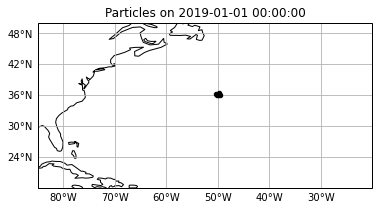

In [7]:
VFleet.plotfloat()

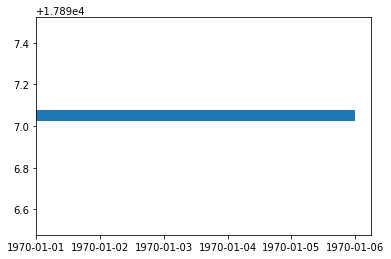

In [8]:
plt.hist(VFleet.time,rwidth=0.5,orientation='horizontal');

# Run the virtual fleet simulation

In [9]:
%%time
# Define where to store results
run_outputs = "out"
output_file = run_outputs + '/test_%s.nc' % pd.to_datetime('now').strftime("%Y%m%d%H%M%S")
print("Simulation data saved in:", output_file)

# USAGE : float_object.simulate(duration=days,dt_run=hours,dt_out=hours,output_file='my_advection_nXX.nc')
# VFleet.simulate(duration=12, dt_run=1/4, dt_out=1/6, output_file=output_file)
VFleet.simulate(duration=100, dt_run=1/2, dt_out=1, output_file=output_file)

Simulation data saved in: out/test_20210823084315.nc
Simulation will be saved in : out/test_20210823084315.nc


INFO: Compiled ArgoParticleArgoVerticalMovementAdvectionRK4 ==> /tmp/parcels-500721/da765d9f81cb5a1c1fa89fa2d1002454_0.so
INFO: Temporary output files are stored in out/out-CXNIVKRQ.
INFO: You can use "parcels_convert_npydir_to_netcdf out/out-CXNIVKRQ" to convert these to a NetCDF file during the run.
100% |########################################################################|


CPU times: user 20.3 s, sys: 726 ms, total: 21.1 s
Wall time: 22.1 s


# Plot the virtual fleet simulation results

In [10]:
# Load simulation results:
simu = xr.open_dataset(output_file)
simu

<xarray.Dataset>
Dimensions:      (obs: 2401, traj: 5)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory   (traj, obs) float64 ...
    time         (traj, obs) datetime64[ns] ...
    lat          (traj, obs) float32 ...
    lon          (traj, obs) float32 ...
    z            (traj, obs) float32 ...
    cycle_phase  (traj, obs) float32 ...
    cycle_age    (traj, obs) float32 ...
    drift_age    (traj, obs) float32 ...
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.1.4
    parcels_mesh:           spherical

/opt/anaconda3/envs/virtualfleet/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


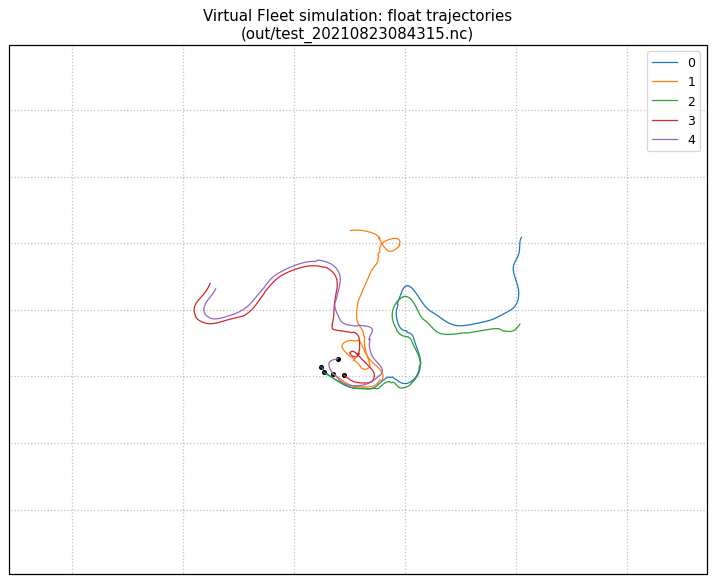

In [11]:
pr1 = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,10), dpi=90)
ax3 = fig.add_subplot(1,1,1,projection=pr1)
ax3.add_feature(land_feature, edgecolor='black')
ax3.set_extent([simu.lon.min()-5, simu.lon.max()+5, simu.lat.min()-5, simu.lat.max()+5])
ax3.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle=':')

for i in simu['traj']:
    this = simu.isel(traj=i).sortby('time')
    ax3.plot(this['lon'][0], this['lat'][0],'k.', transform=pr1)
    ax3.plot(this['lon'], this['lat'],linewidth=1, transform=pr1, label=str(i.values))

plt.title("Virtual Fleet simulation: float trajectories\n(%s)" % output_file);
plt.legend()

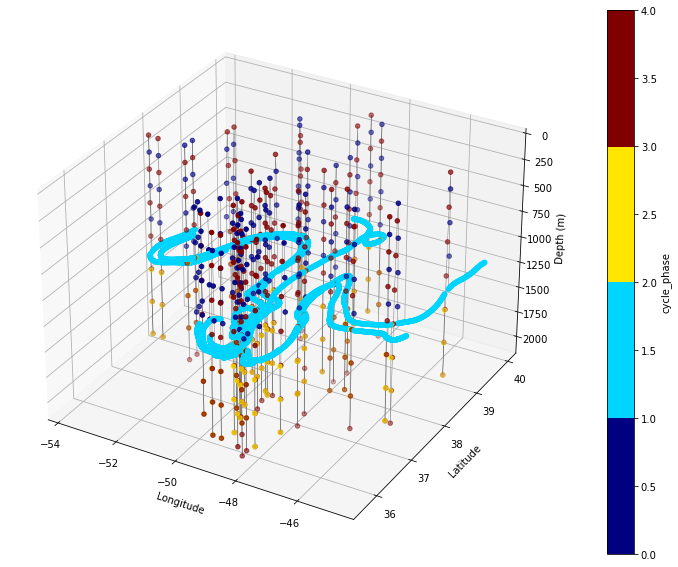

In [12]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

for it in simu['traj']:
    trj = simu.sel(traj=it)
    ax.plot(trj['lon'], trj['lat'], trj['z'], 'gray', linewidth=0.5)
    sc = ax.scatter(trj['lon'], trj['lat'], trj['z'], c=trj['cycle_phase'], cmap=mpl.cm.get_cmap('jet', 4))
cl = plt.colorbar(sc)
cl.ax.set_ylabel('cycle_phase')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Depth (m)")
ax.set_zlim(np.max(trj['z']),0)
plt.show()

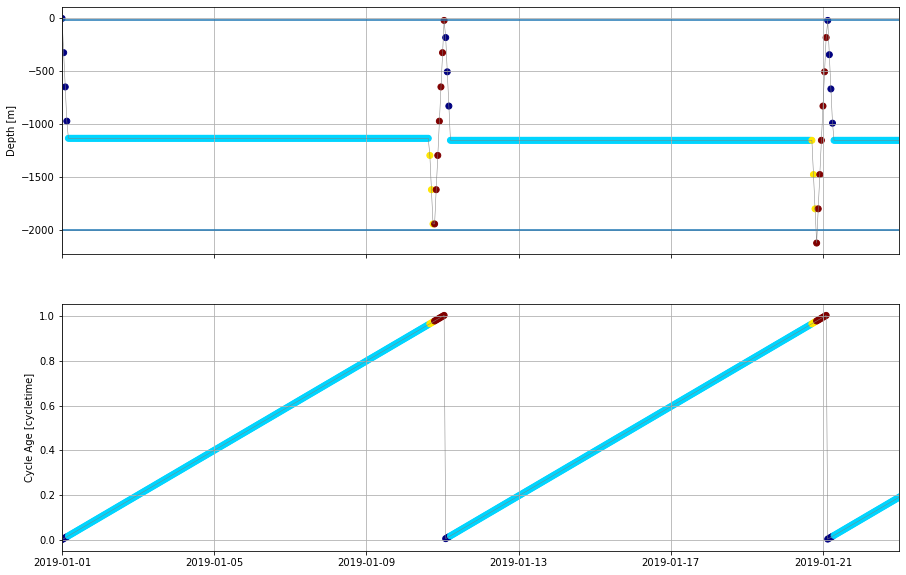

In [13]:
cycletime = 10 * 86400  # in s

trj = simu.isel(traj=0)
# trj = simu.isel(traj=nfloats-1)

dpt = trj['z']
x = trj['time'].values
y = trj['cycle_age']/cycletime

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10), sharex=True)
ax = ax.flatten()

ax[0].plot(x, -dpt, 'gray', linewidth=0.5)
sc = ax[0].scatter(x, -dpt, c=trj['cycle_phase'], marker='o', cmap=mpl.cm.get_cmap('jet', 4))
ax[0].grid()
ax[0].set_ylabel('Depth [m]')
ax[0].hlines(-20,x[~np.isnan(x)][0], x[~np.isnan(x)][-1])
ax[0].hlines(-2000,x[~np.isnan(x)][0], x[~np.isnan(x)][-1])

ax[1].plot(x, y, 'gray', linewidth=0.5)
sc = ax[1].scatter(x, y, c=trj['cycle_phase'], marker='o', cmap=mpl.cm.get_cmap('jet', 4))
ax[1].set_ylabel('Cycle Age [cycletime]')
ax[1].grid()

[i.set_xlim(x[0], x[int((cycletime/86400+1)*24*2/VFleet.run_params['dt_out'])]) for i in ax];

In [168]:
for i in simu['traj']:
    ds = simu.sel(traj=i)
    print("Launch date:", ds['time'][0].values)

Launch date: 2019-01-01T00:00:00.000000000
Launch date: 2019-01-15T00:00:00.000000000
Launch date: 2019-02-01T00:00:00.000000000
Launch date: 2019-02-15T00:00:00.000000000
